# Importações

In [4]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import sys
import argparse
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

# Variáveis Globais

In [14]:
train_size        = 60 # Tamanho dos dados para treinamento
test_size         = 20 # Tamanho dos dados para teste
max_vid_per_class = 30 # Número máximo de vídeos por classe
batch_size        = 60 # Tamanho total dos dados de treinamento e validação
num_of_frames     = 12 # Número de frames que o vídeo será dividido
width             = 64 # Largura da imagem
height            = 48 # Altura da imagem
num_of_channels   = 1  # Número de canais da imagem (cinza, RGB, etc.)
num_of_classes    = 2  # Número de classes que serão utilizadas

# Classes

In [2]:
class_names = {
    "Acontecer": 0, "Aluno": 1, "Amarelo": 2, 'America': 3
}

# Transformação dos frames de vídeos para treinamento

In [15]:
video_classes = './LIBRAS-Dataset/Treino/' # caminho da pasta com os arquivos
X_data_train = [] # armazena os frames
Y_data_train = [] # armazena as labels
list_of_classes = os.listdir(video_classes) # pega o nome de todos os arquivos dentro da pasta
print(list_of_classes)

class_counter = 0
for k in list_of_classes:
    if (class_counter >= num_of_classes):
        break
    class_counter = class_counter + 1
    video_folder = str(video_classes + k + '/')
    list_of_videos = os.listdir(video_folder)
    contador = 0
    print('\n===== ' + k + ' =====\n')
    # pega o nome de cada arquivo de vídeo e passa para transformar em frames
    for i in list_of_videos:
        if contador >= max_vid_per_class:
            print('\n\n===== FIM DA CLASSE =====\n')
            break
        contador = contador + 1
        # caminho do vídeo
        vid = str(video_folder + i)
        # lê o vídeo
        cap = cv2.VideoCapture(vid)
        frames = [] # armazenar os frames
        count = 0 # contador para pegar cada frame
        for j in range(num_of_frames): # aqui pegamos n frames de acordo com num_of_frames
            # 1000 = 1 segundo, 500 = meio segundo...
            cap.set(cv2.CAP_PROP_POS_MSEC,(count*250)) # seta o momento do vídeo para pegar o frame
            ret, frame = cap.read() # pega de fato o frame, e se deu sucesso ou não
            if ret == True: # se deu sucesso...
                print('S=>', end="")
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converte o frame para cinza
                frame = cv2.resize(frame,(width,height),interpolation=cv2.INTER_AREA) # redimensiona o frame
                frames.append(frame) # adiciona o frame para o vetor de frames
            else:
                print('*E*=>', end="")
            count = count + 1
        X_data_train.append(frames) # adiciona todos os frames de um vídeo
        Y_data_train.append(class_names[k]) # adiciona a label do conjunto de frames
X_data_train = np.array(X_data_train) # transforma o vetor de frames em array numpy
Y_data_train = np.array(Y_data_train) # transforma o vetor de label dos frames em array numpy
print('\n\n===== FIM =====\n\n')

['Acontecer', 'Aluno', 'Amarelo', 'America', 'Aproveitar', 'Bala', 'Banco', 'Banheiro', 'Barulho', 'Cinco', 'Conhecer', 'Espelho', 'Esquina', 'Filho', 'Maca', 'Medo', 'Ruim', 'Sapo', 'Vacina', 'Vontade']

===== Acontecer =====

S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S

# Transformação dos frames de vídeos para teste

In [16]:
video_classes = './LIBRAS-Dataset/Teste/' # caminho da pasta com os arquivos
X_data_test = [] # armazena os frames
Y_data_test = [] # armazena as labels
list_of_classes = os.listdir(video_classes) # pega o nome de todos os arquivos dentro da pasta
print(list_of_classes)

class_counter = 0
for k in list_of_classes:
    if (class_counter >= num_of_classes):
        break
    class_counter = class_counter + 1
    video_folder = str(video_classes + k + '/')
    list_of_videos = os.listdir(video_folder)
    contador = 0
    print('\n===== ' + k + ' =====\n')
    # pega o nome de cada arquivo de vídeo e passa para transformar em frames
    for i in list_of_videos:
        if contador >= max_vid_per_class:
            print('\n\n===== FIM DA CLASSE =====\n')
            break
        contador = contador + 1
        # caminho do vídeo
        vid = str(video_folder + i)
        # lê o vídeo
        cap = cv2.VideoCapture(vid)
        frames = [] # armazenar os frames
        count = 0 # contador para pegar cada frame
        for j in range(num_of_frames): # aqui pegamos n frames de acordo com num_of_frames
            # 1000 = 1 segundo, 500 = meio segundo...
            cap.set(cv2.CAP_PROP_POS_MSEC,(count*250)) # seta o momento do vídeo para pegar o frame
            ret, frame = cap.read() # pega de fato o frame, e se deu sucesso ou não
            if ret == True: # se deu sucesso...
                print('S=>', end="")
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converte o frame para cinza
                frame = cv2.resize(frame,(width,height),interpolation=cv2.INTER_AREA) # redimensiona o frame
                frames.append(frame) # adiciona o frame para o vetor de frames
            else:
                print('*E*=>', end="")
            count = count + 1
        X_data_test.append(frames) # adiciona todos os frames de um vídeo
        Y_data_test.append(class_names[k]) # adiciona a label do conjunto de frames
X_data_test = np.array(X_data_test) # transforma o vetor de frames em array numpy
Y_data_test = np.array(Y_data_test) # transforma o vetor de label dos frames em array numpy
print('\n\n===== FIM =====\n\n')

['Acontecer', 'Aluno', 'Amarelo', 'America', 'Aproveitar', 'Bala', 'Banco', 'Banheiro', 'Barulho', 'Cinco', 'Conhecer', 'Espelho', 'Esquina', 'Filho', 'Maca', 'Medo', 'Ruim', 'Sapo', 'Vacina', 'Vontade']

===== Acontecer =====

S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>
===== Aluno =====

S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>

===== FIM =====




# Formato dos dados

In [17]:
print(X_data_train.shape)
print(Y_data_train.shape)
print(Y_data_train)

print(X_data_test.shape)
print(Y_data_test.shape)
print(Y_data_test)

(60, 12, 48, 64)
(60,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(20, 12, 48, 64)
(20,)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


# Embaralhamento dos dados

In [8]:
X_data_train, Y_data_train = shuffle(X_data_train, Y_data_train)
print(Y_data_train)

X_data_test, Y_data_test = shuffle(X_data_test, Y_data_test)
print(Y_data_test)

[0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 0 0 0]
[1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0]


# Exemplo de frames de um vídeo

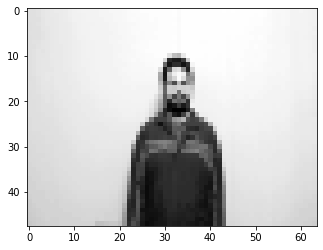

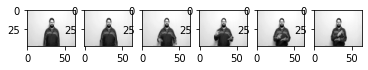

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

# converte a imagem de numpy para Image
image0 = Image.fromarray(X_data_train[0][0])
image1 = Image.fromarray(X_data_train[0][1])
image2 = Image.fromarray(X_data_train[0][2])
image3 = Image.fromarray(X_data_train[0][3])
image4 = Image.fromarray(X_data_train[0][4])
image5 = Image.fromarray(X_data_train[0][5])

# plota as imagens
plt.imshow(image0, 'gray')
f, axarr = plt.subplots(1, 6)
axarr[0].imshow(image0, 'gray')
axarr[1].imshow(image1, 'gray')
axarr[2].imshow(image2, 'gray')
axarr[3].imshow(image3, 'gray')
axarr[4].imshow(image4, 'gray')
axarr[5].imshow(image5, 'gray')

# Remodelar o conjunto de dados
Exemplo:
So, if you have 10000 samples in total, using sets of 10 frames per input, with 30 x 30 dimensions and 1 channel of color, you may reshape your X_data like:

X_data = X_data.reshape(10000, 10, 30, 30, 1)

In [10]:
# transforma os dados dos frames armazenados no formato ideal para ser usado no treinamento
X_data_train = X_data_train.reshape(train_size, num_of_frames, width, height, num_of_channels)
print(np.shape(X_data_train))

X_data_test = X_data_test.reshape(test_size, num_of_frames, width, height, num_of_channels)
print(np.shape(X_data_test))

(32, 12, 64, 48, 1)
(20, 12, 64, 48, 1)


# Definição da Rede Neural Convolucional 3D 

In [18]:
 def get_model():
    
    # Camadas do modelo
    
    model = keras.Sequential()

    model.add(keras.layers.Conv3D(50, (5,7,7), activation='relu', input_shape=(num_of_frames, width, height, num_of_channels)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling3D((1, 2, 2), padding='same'))

    model.add(keras.layers.Conv3D(50, (5,7,7), activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling3D((1, 2, 2), padding='same'))
    
    model.add(keras.layers.Conv3D(10, (3,5,5), activation='relu'))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Flatten())
#     model.add(keras.layers.Dense(200, activation='sigmoid'))
#     model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(num_of_classes, activation='sigmoid', use_bias=True))
    
    # Compilação do modelo
    
    initial_learning_rate = 0.0001
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
    )
    
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        metrics=["acc"],
    )
    
#     model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

# Constrói o modelo.
model = get_model()

# Dados do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 8, 58, 42, 50)     12300     
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 58, 42, 50)     200       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 8, 29, 21, 50)     0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 4, 23, 15, 50)     612550    
_________________________________________________________________
batch_normalization_7 (Batch (None, 4, 23, 15, 50)     200       
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 4, 12, 8, 50)      0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 2, 8, 4, 10)      

# Treinamento do Modelo

In [ ]:
# epochs = 100
# model.fit(X_data_train, Y_data_train, epochs=epochs, batch_size=train_size, shuffle=True)

# Treinamento do modelo até determinada acurácia

In [ ]:
epochs = 100
accuracy = 0
while accuracy < 0.89:
    model.fit(X_data_train, Y_data_train, epochs=epochs, batch_size=train_size, shuffle=True)
    result = model.evaluate(X_data_test, Y_data_test)
    if (result[1] > accuracy):
        model.save('./model/')
        accuracy = result[1]
    print(result[1])

# Treinamento do modelo até determinada acurácia, com dados de entrada aleatórios

In [ ]:
epochs = 100
accuracy = 0
while accuracy < 0.7:
    # Embaralha os dados
    X_data_train, Y_data_train = shuffle(X_data_train, Y_data_train)
    X_data_test, Y_data_test   = shuffle(X_data_test, Y_data_test)

    # transforma os dados dos frames armazenados no formato ideal para ser usado no treinamento
    X_data_train = X_data_train.reshape(train_size, num_of_frames, width, height, num_of_channels)
    X_data_test  = X_data_test.reshape(test_size, num_of_frames, width, height, num_of_channels)
    
    model.fit(X_data_train, Y_data_train, epochs=epochs, batch_size=train_size, shuffle=True)
    result = model.evaluate(X_data_test, Y_data_test)
    if (result[1] > accuracy):
        model.save('./model/')
        accuracy = result[1]
    print(result[1])

Epoch 1/100


# Validação do modelo

In [13]:
model.evaluate(X_data_test, Y_data_test)

1/1 [==============================] - 0s 198ms/step - loss: 1.3640 - acc: 0.5500


[1.363975167274475, 0.550000011920929]

# Predição do modelo

In [15]:
prediction = model.predict(np.expand_dims(X_data_test[3], axis=0))[0]
print(Y_data_test)
for predict, name in zip(prediction, class_names):
    print(
        "%.2f ==> %s"
        % ((100 * predict), name)
    )

[1 1 0 2 1 0 1 3 0 2 3 1 3 3 3 0 2 0 2 2]
58.63 ==> Acontecer
79.22 ==> Aluno
46.48 ==> Amarelo
26.10 ==> America


# Salvar o modelo

In [ ]:
model.save('./model/')

# Carregar o modelo

In [ ]:
newModel = keras.models.load_model('./model/')